# Dataset

## Libraries and settings 

In [1]:
import pandas as pd

# Detect the encoding
import chardet 

# To store data
import pickle
from pathlib import Path

# Charts
import matplotlib.pyplot as plt

In [2]:
# Settings to visualizate all the content
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

## Load files

In [3]:
# Columns names for Twitter data (not including in the raw data)
twitter_columns=['Sentiment','ID','Date','Query','User','Text','human_sentiment']

# Paths
path_twitter= 'Data/Raw Data/Twitter_1000.xlsx'
path_news= 'Data/Raw Data/News_COVID_1000.xlsx'
path_reviews='Data/Raw Data/Reviews_1000.xlsx'

In [4]:
# Read excels
df_twitter = pd.read_excel(path_twitter, index_col=None, header=None, names=twitter_columns)
df_news= pd.read_excel(path_news)
df_reviews= pd.read_excel(path_reviews)

In [5]:
# Datasets shape
print('Twitter shape: ', df_twitter.shape)
print('News shape: ',df_news.shape)
print('Reviews shape: ',df_reviews.shape)

Twitter shape:  (1000, 7)
News shape:  (1000, 10)
Reviews shape:  (1000, 21)


## Data Consolidation 

In [6]:
# Selection of needed columns: Text and human sentiment column

df_twitter= df_twitter[['Text','human_sentiment']]

# It was decided to analyze headlines and description as different text
df_news_title= df_news[['Headline','human_sentiment_title']]
df_news_text= df_news[['Description','human_sentiment']]

# It was decided to analyze title and reviews as different text
# We don't have a sentiment column so we create one empty column in order to standardize the dataset
df_review_title= df_reviews[['review_title','human_sentiment_title']]
df_review_text= df_reviews[['review_text','human_sentiment']]

In [7]:
# Standardize columns names in all the tables

df_twitter = df_twitter.rename(columns={'Text': 'text'})
df_news_title = df_news_title.rename(columns={'human_sentiment_title': 'human_sentiment', 'Headline': 'text'})
df_news_text = df_news_text.rename(columns={'Description': 'text'})
df_review_title = df_review_title.rename(columns={'human_sentiment_title': 'human_sentiment', 'review_title': 'text'})
df_review_text = df_review_text.rename(columns={'review_text': 'text'})

In [8]:
# Create a new column in other to categorize the data
df_twitter['text_type']="twitter"
df_news_title['text_type']="news title"
df_news_text['text_type']="news"
df_review_title['text_type']="review title"
df_review_text['text_type']="review"

In [9]:
# Concatenate different datasets to work with only one dataset
df = pd.concat([df_twitter,df_news_title, df_news_text, df_review_title, df_review_text], axis=0)

In [10]:
df.head()

,text,human_sentiment,text_type
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,twitter
1,is upset that he can't update his Facebook by ...,negative,twitter
2,@Kenichan I dived many times for the ball. Man...,neutral,twitter
3,my whole body feels itchy and like its on fire,negative,twitter
4,"@nationwideclass no, it's not behaving at all....",neutral,twitter


## Text lenght and classifcation

In [11]:
# Function to add a column including the lenght of a selected column and another one with the count of words
def add_length(df, column, length_col):
    length = []
    for value in df[column]:
        length.append(len(str(value)))
    df[length_col] = length
    return df

In [12]:
df= add_length(df,'text','length')
df.head()

,text,human_sentiment,text_type,length
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,twitter,115
1,is upset that he can't update his Facebook by ...,negative,twitter,111
2,@Kenichan I dived many times for the ball. Man...,neutral,twitter,89
3,my whole body feels itchy and like its on fire,negative,twitter,47
4,"@nationwideclass no, it's not behaving at all....",neutral,twitter,111


In [13]:
# Average, Mins and Maxs Lenghts
print('Mean length: ', df['length'].mean())
print('\nMedian length: ', df['length'].median())
print('\nMin length: ', df['length'].min())
print('\nMax length: ', df['length'].max())

Mean length:  155.6378

Median length:  79.0

Min length:  3

Max length:  1354


In [14]:
# Average, Mins and Maxs Lenghts
print('Mean length: ', df.groupby('text_type')['length'].mean())
print('\nMedian length: ', df.groupby('text_type')['length'].median())
print('\nMin length: ', df.groupby('text_type')['length'].min())
print('\nMax length: ', df.groupby('text_type')['length'].max())

Mean length:  text_type
news            358.467
news title       70.851
review          254.337
review title     19.947
twitter          74.587
Name: length, dtype: float64

Median length:  text_type
news            360.0
news title       71.0
review          211.0
review title     18.0
twitter          69.0
Name: length, dtype: float64

Min length:  text_type
news            287
news title       41
review           50
review title      3
twitter           8
Name: length, dtype: int64

Max length:  text_type
news             404
news title        90
review          1354
review title      52
twitter          150
Name: length, dtype: int64


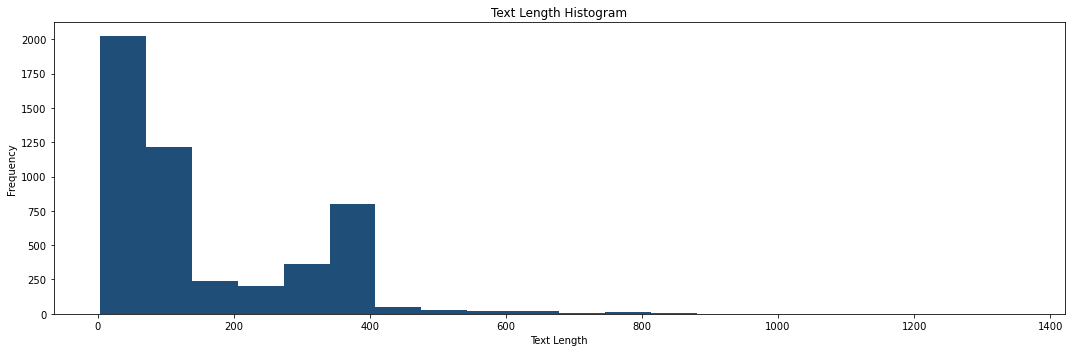

In [15]:
# Text length Histogram
fig, ax = plt.subplots(ncols=1, figsize=(15,5))
ax.hist(df['length'], bins=20, range=(df['length'].min(), df['length'].max()), color='#1F4E79')
ax.set_title('Text Length Histogram')
ax.set_xlabel('Text Length')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [16]:
# Create a histogram
def histogram(dataframe,column, groupby):
    unique_values =dataframe[groupby].unique()
    count= dataframe[groupby].nunique()
    filtered_df = dataframe[dataframe[groupby].isin(unique_values)]
    fig, axes = plt.subplots(nrows=count, ncols=1, figsize=(15, 25))
    for i, value in enumerate(unique_values):
        ax = axes[i] if count > 1 else axes
        df_unique= filtered_df[filtered_df[groupby] == value][column]
        ax.hist(df_unique,bins=20, range=(df_unique.min(), df_unique.max()), color='#1F4E79')
        ax.set_title(f'Histogram for {column} where {groupby} = {value}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    return

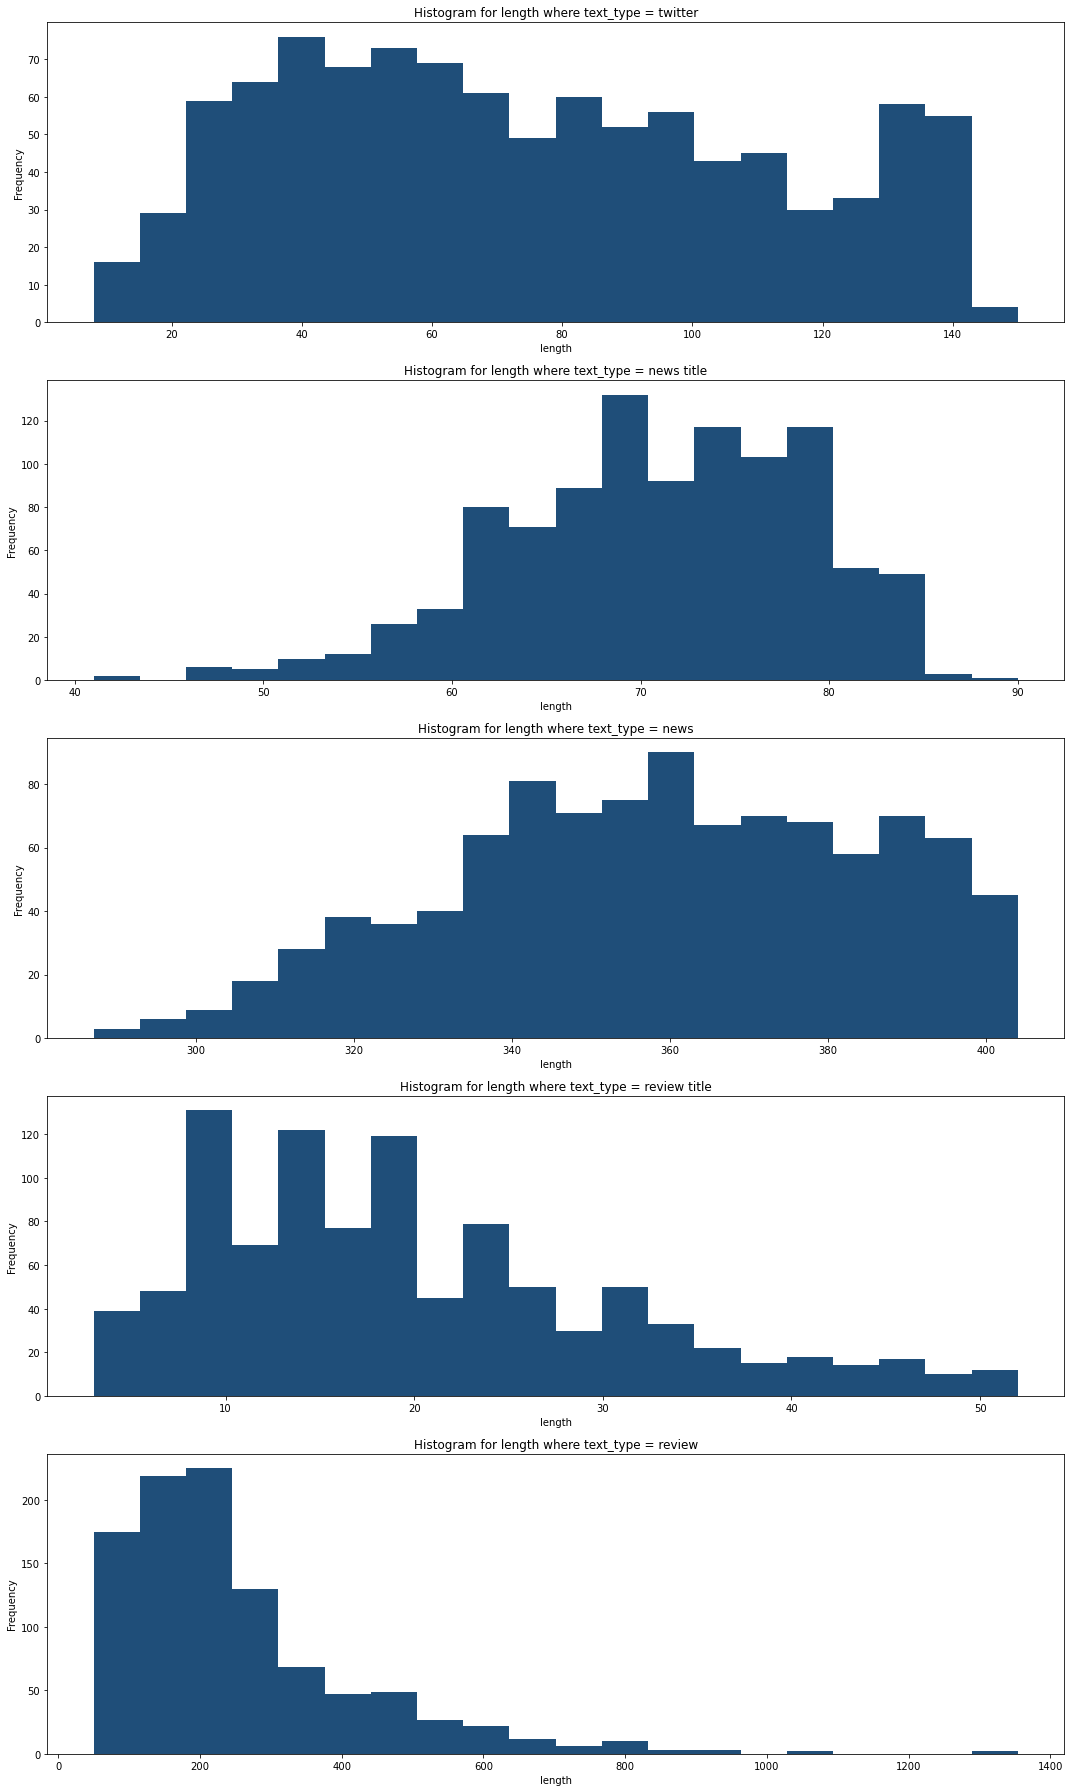

In [17]:
histogram(df,'length','text_type')

In [18]:
# Add classifation based on length
length_classification= []
for index, row in df.iterrows():
    length = row['length']
    if length < 50:
        length_classification.append('short')
    elif length >= 50 and length < 250:
        length_classification.append('medium')
    elif length >= 250:
        length_classification.append('long')
df['length_classification'] = length_classification

In [19]:
# Count per  length classification
print(df.groupby(['length_classification']).size())

length_classification
long      1374
medium    2318
short     1308
dtype: int64


In [20]:
# Count per text type and length classification
print(df.groupby(['text_type', 'length_classification']).size())

text_type     length_classification
news          long                     1000
news title    medium                    989
              short                      11
review        long                      374
              medium                    626
review title  medium                     12
              short                     988
twitter       medium                    691
              short                     309
dtype: int64


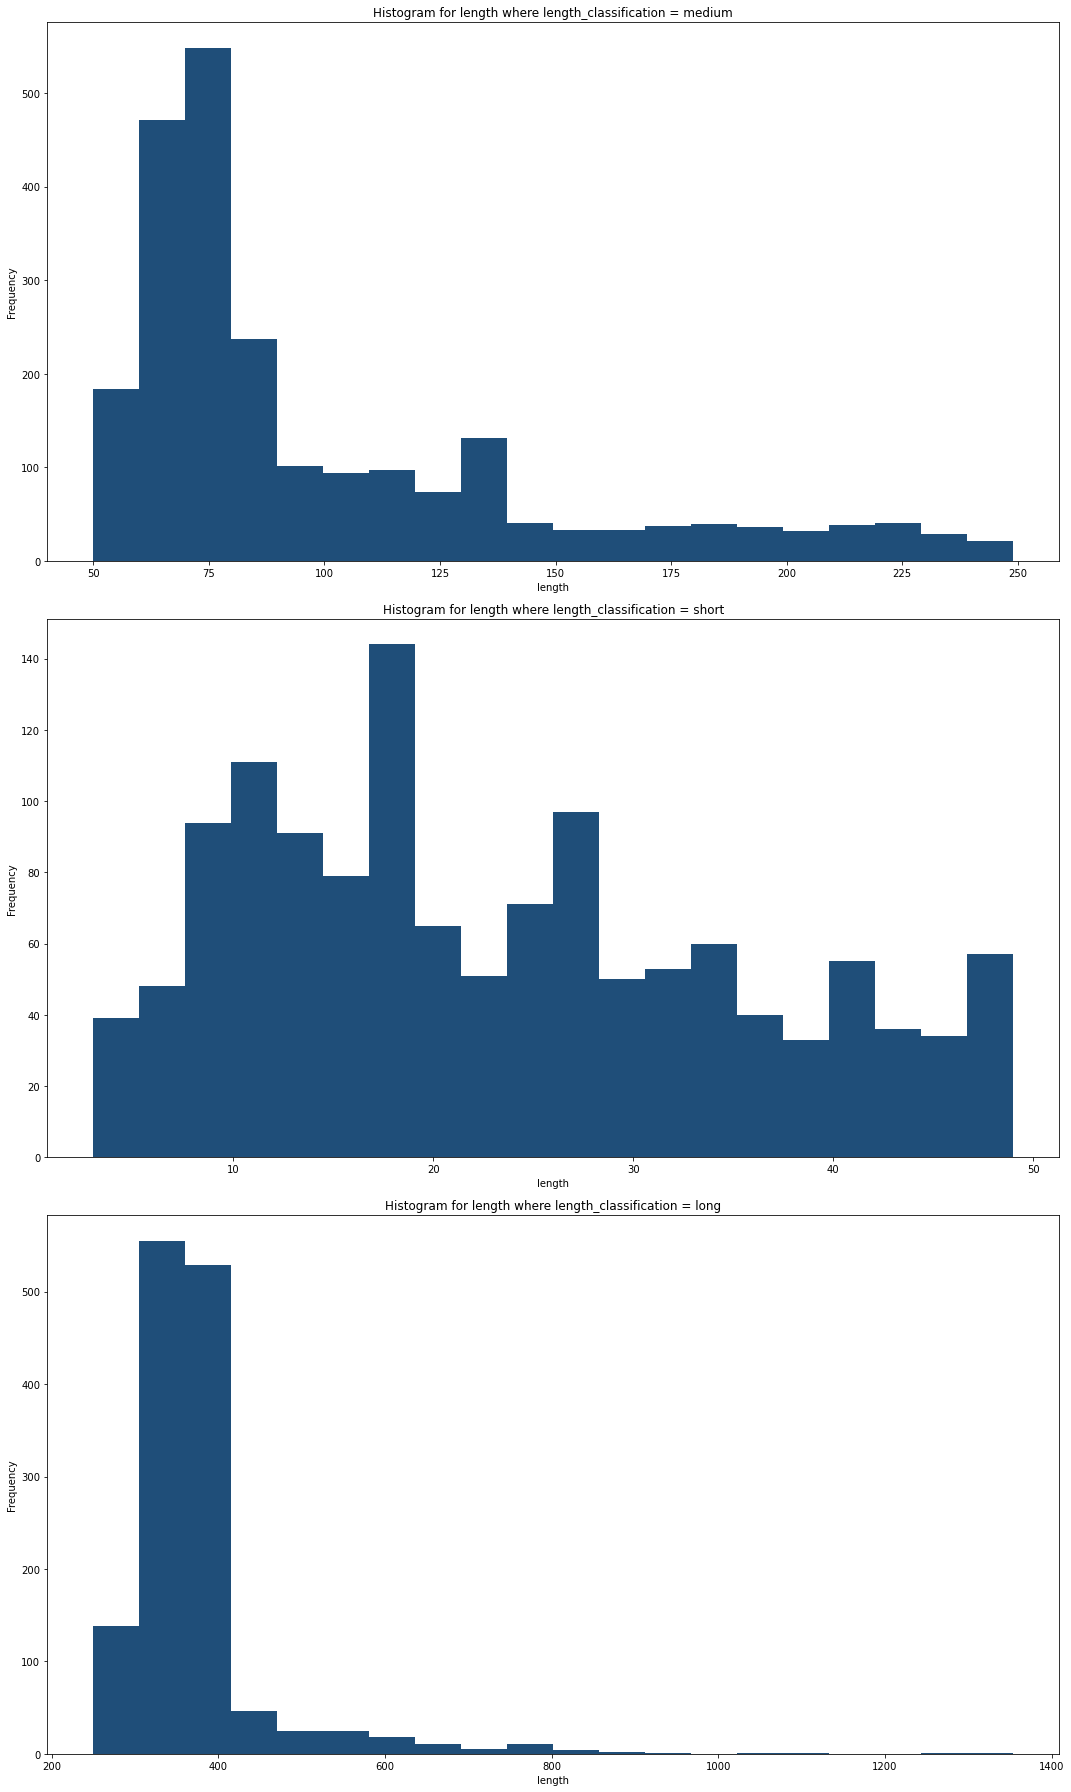

In [21]:
histogram(df,'length','length_classification')

In [22]:
df.head()

,text,human_sentiment,text_type,length,length_classification
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,twitter,115,medium
1,is upset that he can't update his Facebook by ...,negative,twitter,111,medium
2,@Kenichan I dived many times for the ball. Man...,neutral,twitter,89,medium
3,my whole body feels itchy and like its on fire,negative,twitter,47,short
4,"@nationwideclass no, it's not behaving at all....",neutral,twitter,111,medium


## Pickle file

In [23]:
# Create pickle file
picklefile = open('Data/Processed Data/dataset.pkl', 'wb')
pickle.dump(df, picklefile)
picklefile.close()